# Introduction to Statistics in Python

### Libraries and datasets

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('datasets/food_consumption.csv')

## 1. Summary Statistics

### Mean and median
Instructions:
<ul>
<li>Import numpy with the alias np.</li>
<li>Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.</li>
<li>Calculate the mean and median of kilograms of food consumed per person per year for both countries.</li>
<li>Subset food_consumption for rows with data about Belgium and the USA.</li>
<li>Group the subsetted data by country and select only the consumption column.</li>
<li>Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().</li>
</ul>

In [9]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption.query('country == "Belgium"')

# Filter for USA
usa_consumption = food_consumption.query('country == "USA"')

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == "USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean','median']))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64
              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.median())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\21985087

### Mean vs. median
Instructions:
<ul>
<li>Import matplotlib.pyplot with the alias plt.</li>
<li>Subset food_consumption to get the rows where food_category is 'rice'.</li>
<li>Create a histogram of co2_emission for rice and show the plot.</li>
<li>Use .agg() to calculate the mean and median of co2_emission for rice.</li>
</ul>

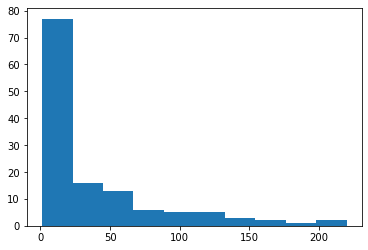

        Unnamed: 0  consumption  co2_emission
mean         718.5    29.375154     37.591615
median       718.5    11.875000     15.200000


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2439675888.py:15: FutureWarning: ['country', 'food_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(rice_consumption.agg(['mean','median']))


In [15]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption.query('food_category == "rice"')

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg(['mean','median']))

## 2. Random Numbers and Probability

## 3. More Distributions and the Central Limit Theorem

## 4. Correlation and Experimental Design